<a href="https://colab.research.google.com/github/donnycharles88/Capstone-Project/blob/main/Capstone_with_Granite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
from langchain_community.llms import Replicate
from google.colab import files
from google.colab import userdata
import os

In [6]:
df = pd.read_csv('Students Social Media Addiction.csv')

# Data Cleaning

In [7]:
print("🔍 Info Dataset:")
print(df.info())

# Cek missing values
print("\n🧾 Missing Values:")
print(df.isnull().sum())

# Hapus baris yang memiliki missing value jika ada
df.dropna(inplace=True)

# Cek duplikasi
print("\n🔁 Jumlah Duplikasi:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Pastikan tipe data benar
df['Age'] = df['Age'].astype(int)
df['Avg_Daily_Usage_Hours'] = df['Avg_Daily_Usage_Hours'].astype(float)
df['Sleep_Hours_Per_Night'] = df['Sleep_Hours_Per_Night'].astype(float)
df['Mental_Health_Score'] = df['Mental_Health_Score'].astype(int)
df['Conflicts_Over_Social_Media'] = df['Conflicts_Over_Social_Media'].astype(int)
df['Addicted_Score'] = df['Addicted_Score'].astype(int)

print("\n✅ Data telah dibersihkan.")

🔍 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    in

# Data Exploration


📊 Statistik Deskriptif:
        Student_ID         Age  Gender Academic_Level Country  \
count   705.000000  705.000000     705            705     705   
unique         NaN         NaN       2              3     110   
top            NaN         NaN  Female  Undergraduate   India   
freq           NaN         NaN     353            353      53   
mean    353.000000   20.659574     NaN            NaN     NaN   
std     203.660256    1.399217     NaN            NaN     NaN   
min       1.000000   18.000000     NaN            NaN     NaN   
25%     177.000000   19.000000     NaN            NaN     NaN   
50%     353.000000   21.000000     NaN            NaN     NaN   
75%     529.000000   22.000000     NaN            NaN     NaN   
max     705.000000   24.000000     NaN            NaN     NaN   

        Avg_Daily_Usage_Hours Most_Used_Platform Affects_Academic_Performance  \
count              705.000000                705                          705   
unique                    NaN   

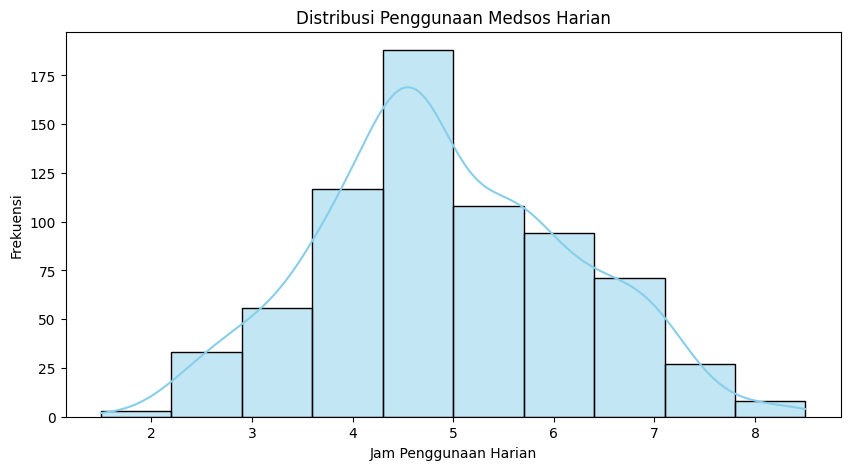

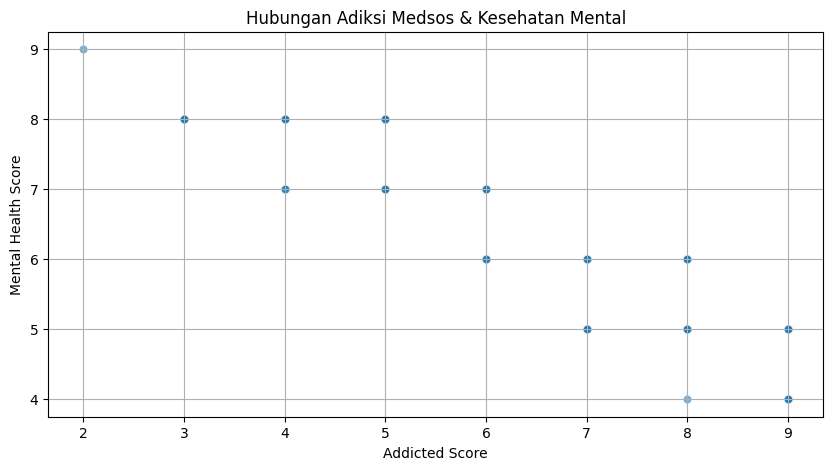

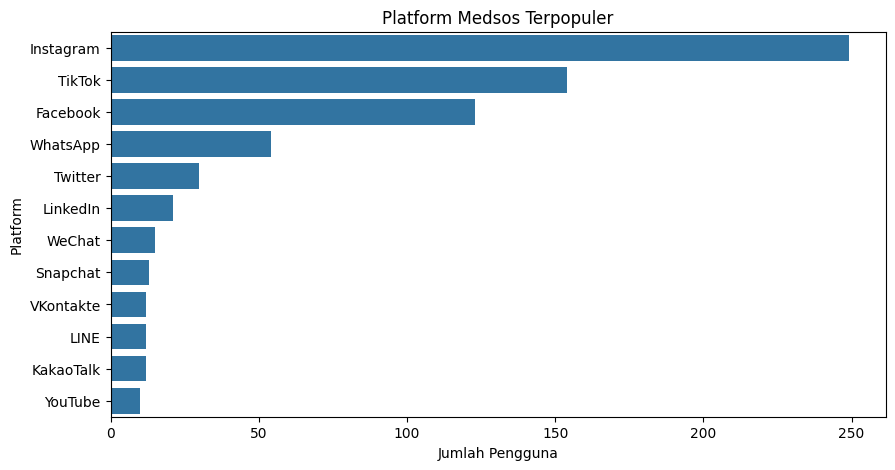

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistik deskriptif
print("\n📊 Statistik Deskriptif:")
print(df.describe(include='all'))

# Distribusi rata-rata penggunaan medsos per hari
plt.figure(figsize=(10,5))
sns.histplot(df['Avg_Daily_Usage_Hours'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Penggunaan Medsos Harian')
plt.xlabel('Jam Penggunaan Harian')
plt.ylabel('Frekuensi')
plt.show()

# Skor adiksi vs skor kesehatan mental
plt.figure(figsize=(10,5))
sns.scatterplot(x='Addicted_Score', y='Mental_Health_Score', data=df, alpha=0.6)
plt.title('Hubungan Adiksi Medsos & Kesehatan Mental')
plt.xlabel('Addicted Score')
plt.ylabel('Mental Health Score')
plt.grid(True)
plt.show()

# Platform medsos paling populer
plt.figure(figsize=(10,5))
sns.countplot(y='Most_Used_Platform', data=df, order=df['Most_Used_Platform'].value_counts().index)
plt.title('Platform Medsos Terpopuler')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Platform')
plt.show()

# Analisis Statik

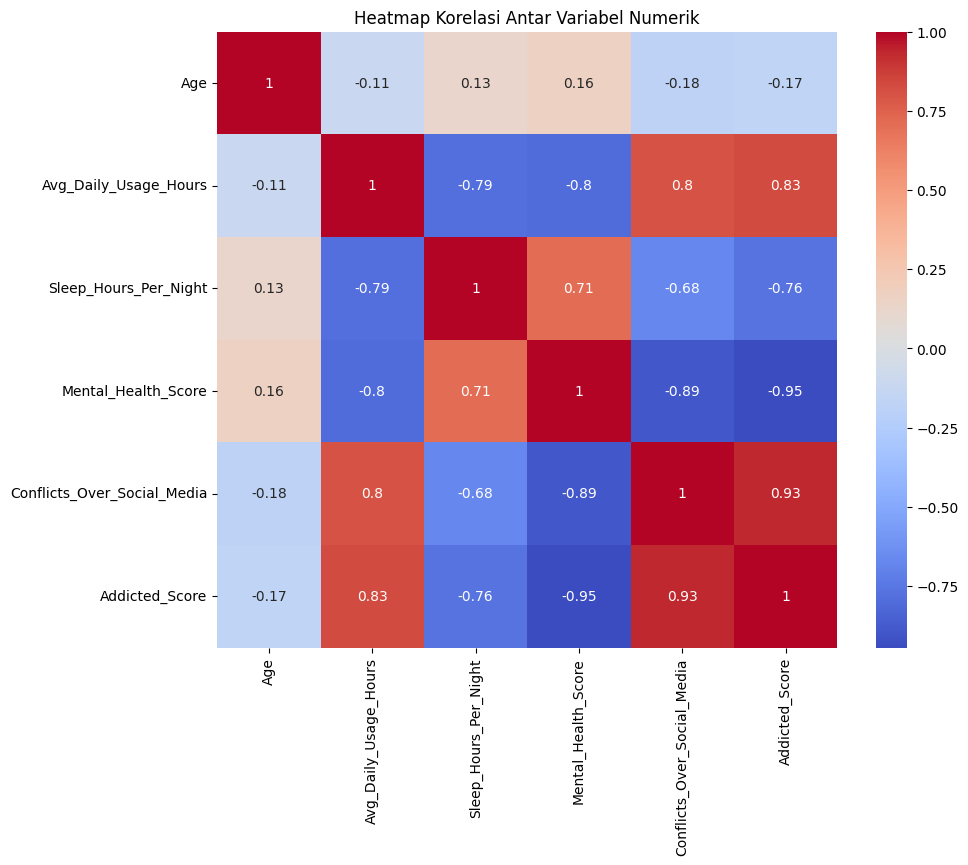


📈 Model Regresi: R² = 0.89
Persamaan: Mental_Health_Score = -0.66 * Addicted_Score + 10.46


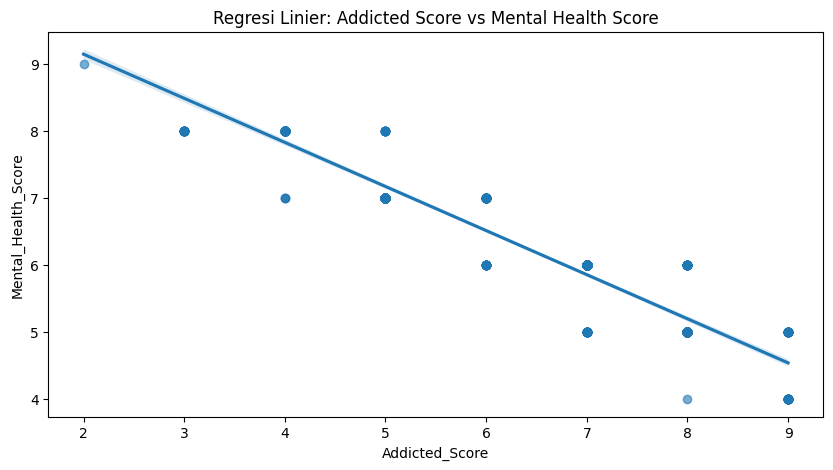

In [9]:
# Korelasi antar variabel numerik
numeric_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

# Regresi linier: Addicted Score vs Mental Health Score
from sklearn.linear_model import LinearRegression

X = df[['Addicted_Score']]
y = df['Mental_Health_Score']

model = LinearRegression()
model.fit(X, y)
r2 = model.score(X, y)

print(f"\n📈 Model Regresi: R² = {r2:.2f}")
print(f"Persamaan: Mental_Health_Score = {model.coef_[0]:.2f} * Addicted_Score + {model.intercept_:.2f}")

# Plot hasil regresi
plt.figure(figsize=(10,5))
sns.regplot(x='Addicted_Score', y='Mental_Health_Score', data=df, scatter_kws={'alpha':0.6})
plt.title('Regresi Linier: Addicted Score vs Mental Health Score')
plt.show()

# Interpretasi Hasi

In [11]:
import replicate


# Persiapkan prompt
summary = {
    "avg_usage": df['Avg_Daily_Usage_Hours'].mean(),
    "mental_health_corr": corr_matrix.loc['Addicted_Score', 'Mental_Health_Score'],
    "top_platform": df['Most_Used_Platform'].mode()[0],
    "regression_eq": f"Mental_Health_Score = {model.coef_[0]:.2f} * Addicted_Score + {model.intercept_:.2f}",
    "r2_score": r2
}

prompt = f"""
Anda adalah seorang analis data ahli. Berdasarkan analisis terhadap dataset Students Social Media Addiction:

- Rata-rata waktu penggunaan medsos harian adalah {summary['avg_usage']:.2f} jam.
- Ada korelasi negatif antara Addicted Score dan Mental Health Score sebesar {summary['mental_health_corr']:.2f}.
- Platform medsos paling populer adalah "{summary['top_platform']}".
- Hasil regresi menunjukkan bahwa: {summary['regression_eq']}
- Dengan R² sebesar {summary['r2_score']:.2f}, artinya variasi dalam Mental Health Score dapat dijelaskan oleh Addicted Score hingga {summary['r2_score']*100:.0f}%.

Tolong interpretasikan temuan ini dan jelaskan implikasi dari adiksi medsos terhadap kesehatan mental mahasiswa/pelajar secara umum.
"""

# Gunakan API Granite via Replicate
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

output = replicate.run(
    "ibm-granite/granite-3.3-8b-instruct",
    input={
        "prompt": prompt,
        "temperature": 0.7,
        "max_new_tokens": 500
    }
)

print("\n🤖 Interpretasi AI:")
for token in output:
    print(token, end="")


🤖 Interpretasi AI:
Berdasarkan analisis dataset tentang adiksi medsos mahasiswa/pelajar, beberapa tuntutan penting dapat diambil:

1. **Waktu Penggunaan Mesos**: Rata-rata waktu penggunaan medsos harian mahasiswa adalah 4.92 jam. Ini menunjukkan bahwa medsos menjadi bagian yang signifikan dari kehidupan mereka, dengan mereka menghabiskan waktu yang banyak untuk menggunakannya setiap hari.

2. **Korelasi Negatif antara Adiksi dan Kesehatan Mental**: Korelasi negatif yang kuat (-0.95) antara Skor Adiksi dan Skor Kesehatan Mental sugarkan hubungan kuat dan sebaliknya antara kedua faktor. Seiring dengan meningkatnya skor adiksi, skor kesehatan mental menurun. Ini sugarkan bahwa mahasiswa yang terlibat lebih dalam medsos mungkin mengalami masalah kesehatan mental yang lebih buruk.

3. **Platform Mesos Terpopuler**: Instagram menjadi platform medsos paling populer di kalangan mahasiswa. Platform visual ini, yang terfokus pada foto dan video, mungkin menjadi lebihan bagi mahasiswa yang ragu 